## Import

In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

## Data Load

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/dacon/open/train.csv') # Train
train_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [5]:
val_df = pd.read_csv('/content/drive/MyDrive/dacon/open/val.csv') # Validation
val_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


## Train/Validation Feature 분포 확인

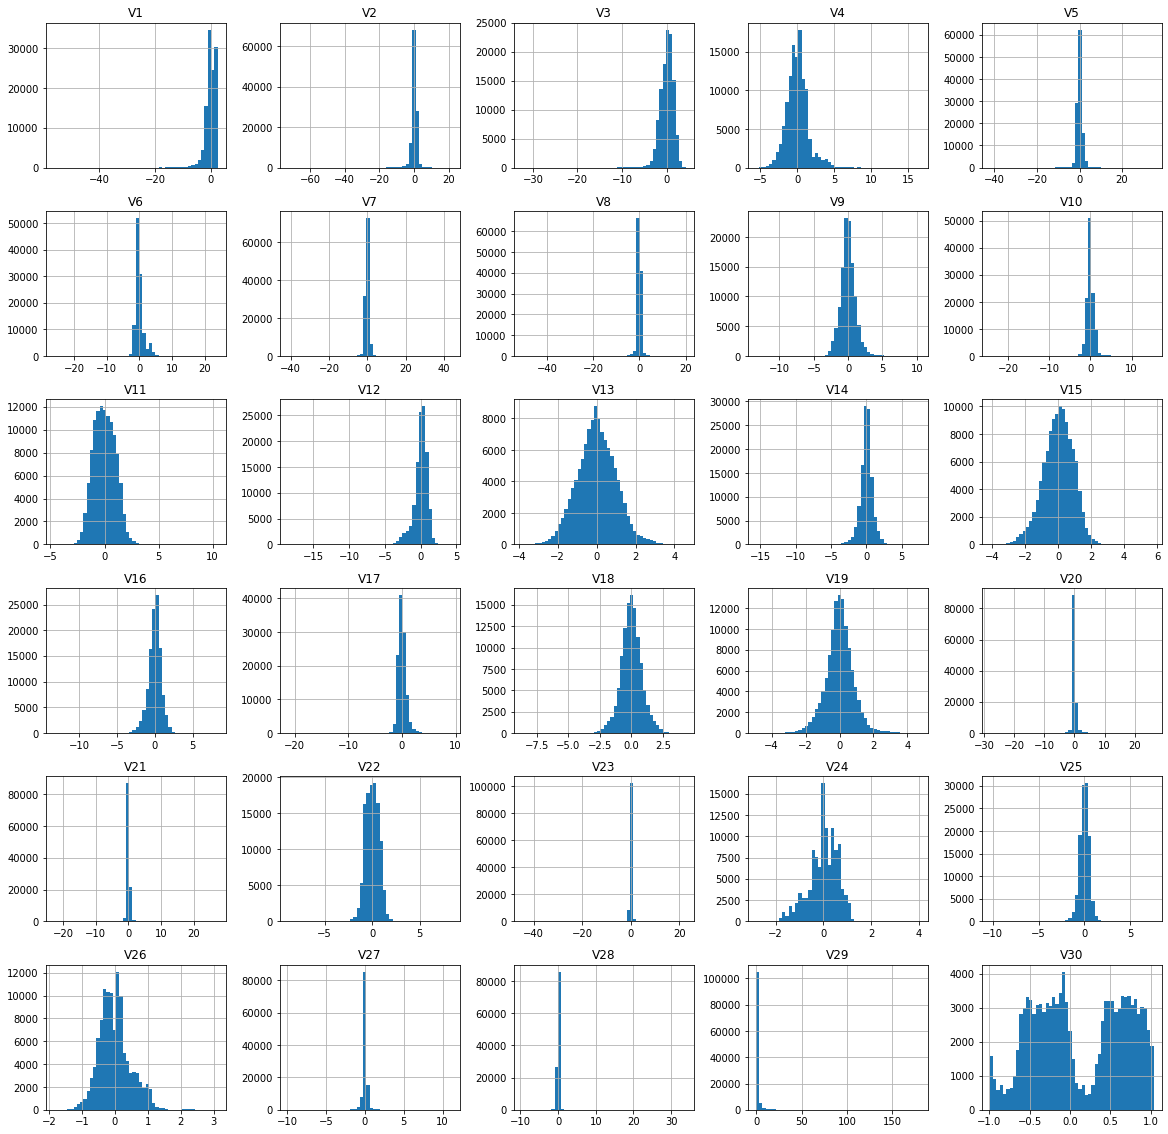

In [6]:
train_df.drop(columns=['ID']).hist(bins = 50, figsize = (20,20))
plt.show()

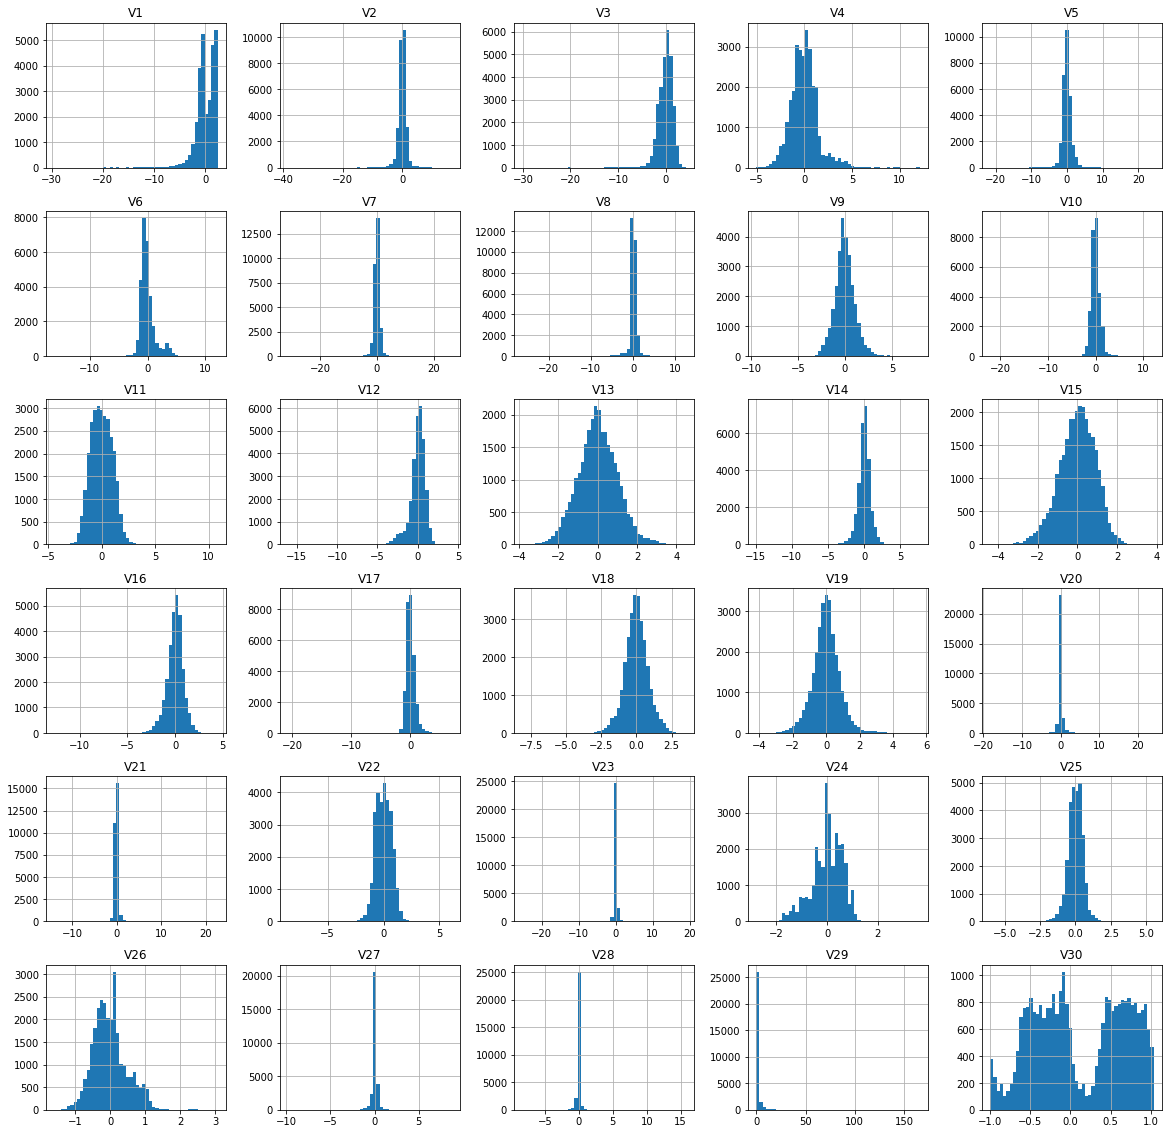

In [7]:
val_df.drop(columns=['ID', 'Class']).hist(bins = 50, figsize = (20,20))
plt.show()

## 정규화

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [9]:
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [10]:
train_mm = mm_scaler.fit_transform(train_df)
train_std = std_scaler.fit_transform(train_df)

train_mm_df = pd.DataFrame(mm_scaler.fit_transform(train_df), columns = train_df.columns)
train_std_df = pd.DataFrame(std_scaler.fit_transform(train_df), columns = train_df.columns)

In [11]:
train_mm_df

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,0.000000,0.935217,0.757840,0.934103,0.270706,0.541195,0.558345,0.494362,0.721503,0.500249,...,0.460476,0.559957,0.678939,0.311866,0.559515,0.345001,0.467876,0.219901,0.029329,0.000000
1,0.000004,0.941878,0.770102,0.934643,0.214438,0.547600,0.547297,0.487889,0.723332,0.505606,...,0.453344,0.515525,0.662607,0.240850,0.614245,0.328350,0.473490,0.222690,0.009566,0.000000
2,0.000011,0.951057,0.782268,0.916852,0.245899,0.553205,0.521798,0.490678,0.721681,0.539951,...,0.451343,0.482764,0.665042,0.358283,0.564839,0.394253,0.482578,0.223141,0.000284,0.000006
3,0.000018,0.947348,0.787124,0.915031,0.231235,0.560066,0.530941,0.498209,0.664343,0.589645,...,0.494412,0.456349,0.666288,0.317645,0.554597,0.362583,0.413120,0.196306,0.003160,0.000035
4,0.000021,0.943101,0.775107,0.882621,0.241224,0.582427,0.596712,0.489438,0.730007,0.547364,...,0.454042,0.499677,0.662401,0.560251,0.598855,0.295739,0.471066,0.224552,0.007219,0.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,0.999975,0.745650,0.880240,0.654373,0.139877,0.488128,0.494546,0.442657,0.795511,0.769177,...,0.436602,0.424488,0.678661,0.229503,0.678199,0.437442,0.569919,0.249640,0.000764,0.999954
113838,0.999979,0.990315,0.770545,0.858421,0.321720,0.547275,0.510138,0.487335,0.714502,0.591789,...,0.458394,0.552012,0.664808,0.404754,0.595667,0.280204,0.471376,0.220331,0.004647,0.999965
113839,0.999982,0.954184,0.779631,0.896621,0.232539,0.550912,0.495560,0.495974,0.715106,0.568277,...,0.450931,0.485399,0.669586,0.466767,0.546515,0.395706,0.476761,0.223145,0.000425,0.999977
113840,0.999996,0.960338,0.781954,0.870809,0.219788,0.562423,0.517680,0.494611,0.719634,0.555254,...,0.449223,0.468346,0.666181,0.427537,0.553440,0.397904,0.480871,0.222859,0.000208,0.999994


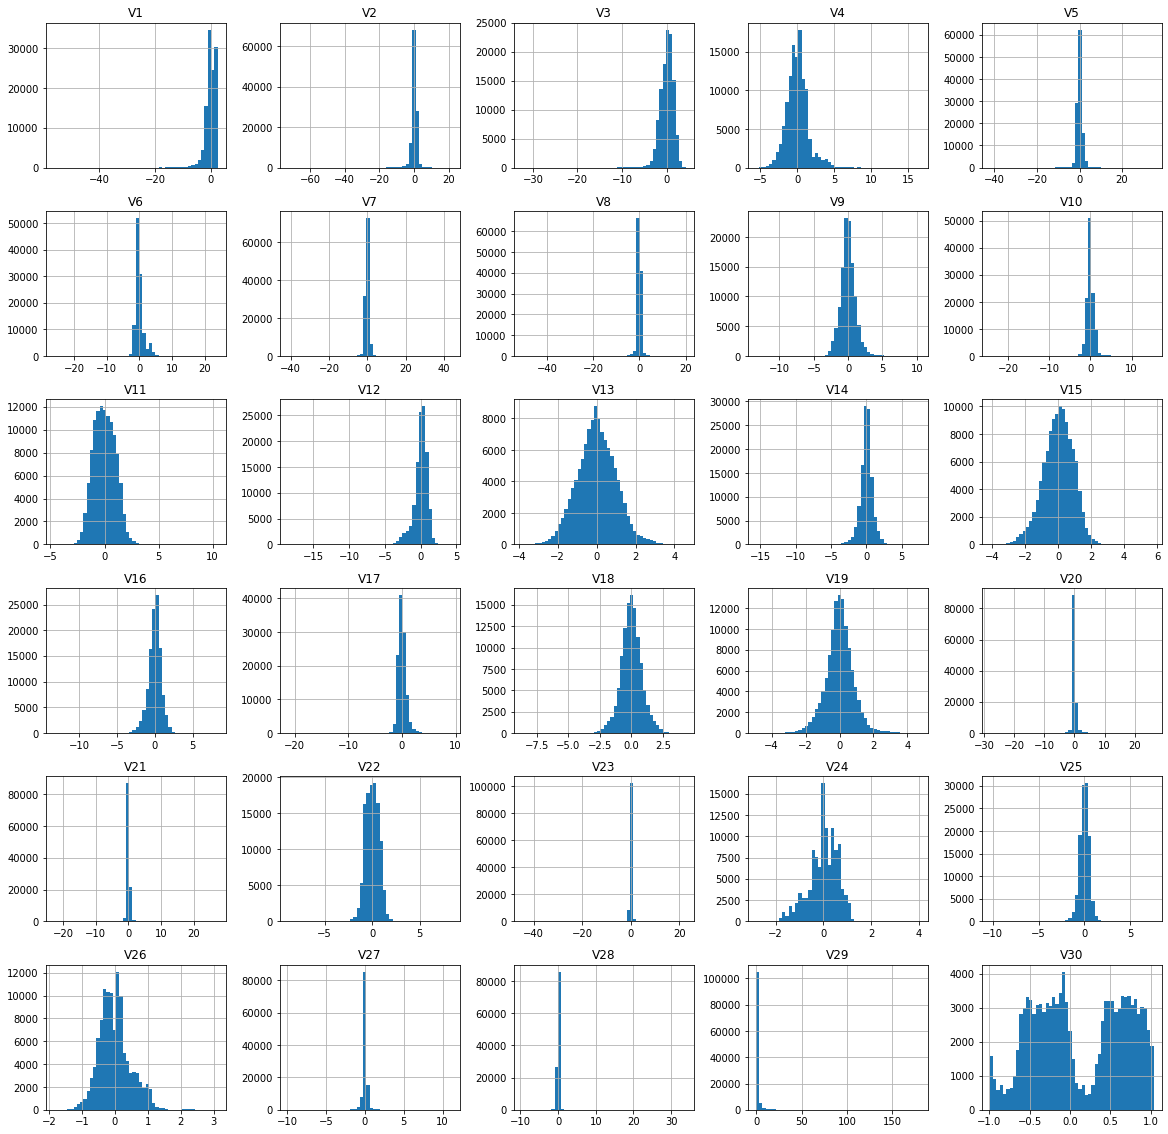

In [12]:
train_df.drop(columns=['ID']).hist(bins = 50, figsize = (20,20))
plt.show()

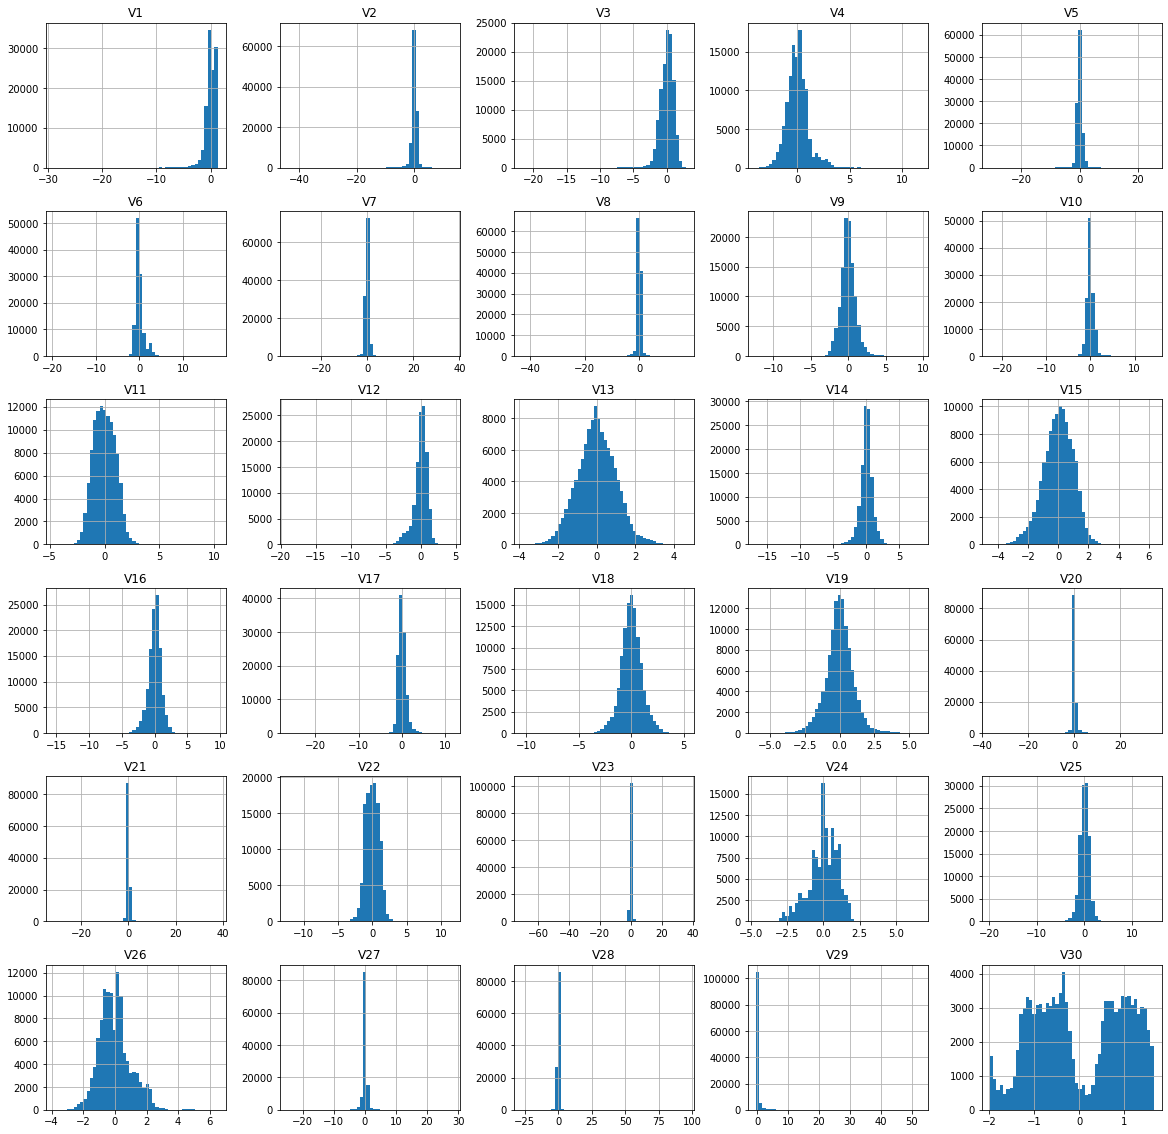

In [13]:
train_std_df.drop(columns=['ID']).hist(bins = 50, figsize = (20,20))
plt.show()

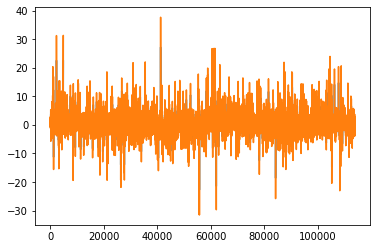

In [14]:
plt.plot(train_df.V21)
# plt.plot(train_mm_df.V21)
plt.plot(train_std_df.V21)

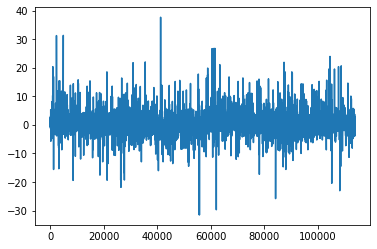

In [15]:
plt.plot(train_std_df.V21)

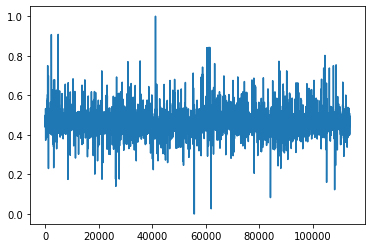

In [16]:
train_mm_df.V21.plot()

## Validation set 사기 거래 비율
#### (*) Validation set의 사기 거래 비율이 다른 데이터집합에서도 비슷하게 발생할 것이라고 가정

In [17]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


## Model : Clustering(K-Means)

In [18]:
model = KMeans(n_clusters=2, random_state=42)

In [19]:
train_x = train_df.drop(columns=['ID']) # Input Data
model.fit(train_x)

KMeans(n_clusters=2, random_state=42)

In [20]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [21]:
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

val_pred = model.predict(val_x) # model prediction
# val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.4948440800099391]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.00      0.00      0.00        30

    accuracy                           0.98     28462
   macro avg       0.50      0.49      0.49     28462
weighted avg       1.00      0.98      0.99     28462



## Model(2),(3) : Normalization

In [22]:
# Train dataset은 Label이 존재하지 않음
train_x_mm = train_mm_df.drop(columns=['ID']) # Input Data
model.fit(train_x_mm)

KMeans(n_clusters=2, random_state=42)

In [23]:
val_pred = model.predict(val_x) # model prediction
# val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.37151935416096243]
              precision    recall  f1-score   support

           0       1.00      0.59      0.74     28432
           1       0.00      0.37      0.00        30

    accuracy                           0.59     28462
   macro avg       0.50      0.48      0.37     28462
weighted avg       1.00      0.59      0.74     28462



In [24]:
# Train dataset은 Label이 존재하지 않음
train_x_std = train_std_df.drop(columns=['ID']) # Input Data
model.fit(train_x_std)

KMeans(n_clusters=2, random_state=42)

In [25]:
val_pred = model.predict(val_x) # model prediction
# val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.35798645378882826]
              precision    recall  f1-score   support

           0       1.00      0.55      0.71     28432
           1       0.00      0.63      0.00        30

    accuracy                           0.55     28462
   macro avg       0.50      0.59      0.36     28462
weighted avg       1.00      0.55      0.71     28462



## PCA

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components = 3)
train_x_pca = pca.fit_transform(train_x)
pca.explained_variance_ratio_

array([0.32027121, 0.08756321, 0.05666223])

In [28]:
pca = PCA(n_components = 3)
train_x_pca = pca.fit_transform(train_x)
model.fit(train_x_pca)
val_x_pca = pca.transform(val_x)
val_pred = model.predict(val_x_pca) # model prediction
# val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.4948171813986511]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.00      0.00      0.00        30

    accuracy                           0.98     28462
   macro avg       0.50      0.49      0.49     28462
weighted avg       1.00      0.98      0.99     28462



In [29]:
pca = PCA(n_components = 3)
train_x_pca = pca.fit_transform(train_x_std)
model.fit(train_x_pca)
val_x_pca = pca.transform(val_x)
val_pred = model.predict(val_x_pca) # model prediction
# val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.3079497357629912]
              precision    recall  f1-score   support

           0       1.00      0.44      0.61     28432
           1       0.00      0.37      0.00        30

    accuracy                           0.44     28462
   macro avg       0.50      0.41      0.31     28462
weighted avg       1.00      0.44      0.61     28462



In [30]:
pca = PCA(n_components = 3)
train_x_pca = pca.fit_transform(train_x_mm)
model.fit(train_x_pca)
val_x_pca = pca.transform(val_x)
val_pred = model.predict(val_x_pca) # model prediction
# val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.29018014176143053]
              precision    recall  f1-score   support

           0       1.00      0.41      0.58     28432
           1       0.00      0.70      0.00        30

    accuracy                           0.41     28462
   macro avg       0.50      0.55      0.29     28462
weighted avg       1.00      0.41      0.58     28462



# DBSCAN

In [31]:
from sklearn.cluster import DBSCAN

### Model without Scaling

In [32]:
def find_eps(eps = 1) : 
  model = DBSCAN(eps = eps, min_samples = 3)
  model.fit(val_x)
  while len(np.unique(model.labels_)) > 2 : 
    model = DBSCAN(eps = eps, min_samples = 3)
    model.fit(val_x)
    eps+=1
    find_eps(eps)

  print(f"optimum eps : {eps}")
    # val_pred = model.predict(val_x)
    # val_score = f1_score(val_y, val_pred, average = 'macro')
    # print(f"Validation F1 Score : [{val_score}]")
    # print(classification_report(val_y, val_pred))

In [33]:
# find_eps()

In [37]:
model = DBSCAN(eps = 15, min_samples = 3)
val_pred = model.fit_predict(val_x)
# np.unique(model.labels_)

In [38]:
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.33305784639551717]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        30

    accuracy                           1.00     28462
   macro avg       0.33      0.33      0.33     28462
weighted avg       1.00      1.00      1.00     28462



### Model scaled with MinMaxScaler

In [ ]:
model = DBSCAN(min_samples = 5)
model.fit(train_x_mm)
val_pred = model.predict(val_x)
val_score = f1_score(val_y, val_pred, average = 'macro')
print(f"Validation F1 Score : [{val_score}]")
print(classification_report(val_y, val_pred))

### Model Scaled with StandardScaler

In [ ]:
model = DBSCAN(min_samples = 5)
model.fit(train_x_std)
val_pred = model.predict(val_x)
val_score = f1_score(val_y, val_pred, average = 'macro')
print(f"Validation F1 Score : [{val_score}]")
print(classification_report(val_y, val_pred))

## Inference : Test set

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/dacon/open/test.csv') # Test
test_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [ ]:
test_x = test_df.drop(columns=['ID'])

In [ ]:
test_pred = model.predict(test_x) # model prediction
# test_pred = get_pred_label(test_pred)

In [ ]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

## Submission

In [ ]:
submit = pd.read_csv('./sample_submission.csv')
submit.head()

FileNotFoundError: ignored

In [ ]:
submit['Class'] = test_pred
submit.to_csv('./submit.csv', index=False)